# Creation Dataframe

In [1]:
import pandas as pd

import plotly.graph_objects as go
import numpy as np

def scroll_visu_dataframe(df, rest_index= False): 
    if rest_index : 
        y = df.reset_index()  # Cela ajoute l'index comme colonne(s) au DataFrame
    else : 
        y = df

    # Mettre à jour les headers pour inclure les noms des colonnes d'index
    headers = ['Index'] + list(y.columns)  # Ajoutez 'Index' ou le nom réel des niveaux d'index si nécessaire

    # Ajuster les valeurs pour inclure les index
    cells_values = [y.index] + [y[col] for col in y.columns]

    fig = go.Figure(data=[go.Table(
        header=dict(values=headers,
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=cells_values,  # Mise à jour pour inclure l'index
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),
        paper_bgcolor='rgba(0,0,0,0)',  
        plot_bgcolor='rgba(0,0,0,0)',
    )

    fig.show()


# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('AMF_short_data.csv', delimiter=',')  # Ajustez le délimiteur si nécessaire
scroll_visu_dataframe(df)


/var/folders/fp/hfmjvl7d45gft5_1gf2dzn640000gn/T/ipykernel_901/3484491540.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.columns

Index(['POSITION HOLDER\nDETENTEUR DE LA POSITION',
       'NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER', 'ISIN',
       'POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE',
       'DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'],
      dtype='object')

# Nombre d'apparition d'un DETENTEUR DE LA POSITION | NOM DE L’ÉMETTEUR

In [3]:
#qui = 'HOLDER'
qui = 'NOM DE L’ÉMETTEUR'

colonne = df.columns[(qui=='NOM DE L’ÉMETTEUR')*1]

nombre_uniques = df[colonne].nunique()
print(f"Nombre d'éléments uniques : {nombre_uniques}")

# Lister les éléments uniques
if qui=='NOM DE L’ÉMETTEUR' :

    emetteurs = df[colonne].unique()
    print(f"Éléments uniques : {emetteurs}")
    holder = []

else : 
    holder =  df[colonne].unique()
    emetteurs = []
    print(f"Éléments uniques : {holder}")




Nombre d'éléments uniques : 118
Éléments uniques : ['REXEL' 'CGG' 'CASINO GUICHARD-PERRACHON' 'TECHNICOLOR'
 'EUTELSAT COMMUNICATIONS' 'BOURBON' 'RENAULT' 'CELLECTIS' 'ELIS' 'GENFIT'
 'ATOS SE' 'AIR FRANCE-KLM' 'ORPEA' 'GAZTRANSPORT ET TECHNIGAZ' 'VALEO'
 'SEB S.A.' 'CAPGEMINI' 'ARKEMA' 'EUROFINS SCIENTIFIC SE' 'SOCIETE BIC'
 'EIFFAGE' 'SOLOCAL GROUP' 'KORIAN' 'ELIOR GROUP' 'PEUGEOT S.A.' 'NOVACYT'
 'MAISONS DU MONDE' 'SES IMAGOTAG' 'VALLOUREC' 'ALSTOM' 'FAURECIA'
 'REMY COINTREAU' 'CLARIANE SE' 'ERAMET' 'BOURBON CORPORATION'
 'GENSIGHT BIOLOGICS S.A.' 'NAVYA' 'SMCP' 'SOITEC' 'SPIE SA' 'GECINA'
 'WORLDLINE' 'TELEVISION FRANCAISE 1' 'NEOEN' 'DBV TECHNOLOGIES'
 'TELEPERFORMANCE' 'CHARGEURS' 'EUROPCAR MOBILITY GROUP'
 'PUBLICIS GROUPE SA' 'AKKA TECHNOLOGIES' 'KAUFMAN & BROAD SA'
 'UBISOFT ENTERTAINMENT' 'SRP GROUPE' 'GAUSSIN S.A.' 'ALTEN' 'RALLYE'
 'NEXANS' 'EUROAPI' 'LAGARDERE SCA' 'NACON' 'MC PHY ENERGY' 'NEXITY'
 'SCOR SE' 'JCDECAUX SA' 'KLEPIERRE' 'ERYTECH PHARMA' 'TECHNIPFMC PLC'
 'C

In [4]:
from find_tickets_holder import search_tickers
import pickle
import os

if not os.path.exists("dictionnaire_tikers.pkl"):

    dic_tikers = dict()
    for emetteur in emetteurs:
        search_tickers(holder, dic_tikers, f'{holder} yahoo')

    with open("dictionnaire_tikers.pkl", "wb") as fichier:
                # Notez que vous devez convertir dic_tickers en un dictionnaire normal pour le sauvegarder avec pickle
                pickle.dump(dict(dic_tikers), fichier)

else : 
    with open("dictionnaire_tikers.pkl","rb") as fichier :
        dic_tikers = pickle.load(fichier)


In [5]:
#TODO chercher les Ticker de cette liste 

ticker_dic = dict()
fail_dic = []
for ex in dic_tikers : 

    test = dic_tikers[ex]
    v1 = test.split('.PA')
    v2 = test.split('(')

    if len(v1) > 1 : 
        if len(v2) > 1 : 
            res = v1[0].split('(')[-1]
            res = f'{res}.PA'
            ticker_dic[ex] = res
        else : 
            res = v1[0].split(' ')[-1]
            res = f'{res}.PA'
            ticker_dic[ex] = res
    else : 
        res = ""
        fail_dic.append(ex)

# Tickers fail : fail_dic 
print(fail_dic)

['BOURBON', 'KORIAN', 'PEUGEOT S.A.', 'FAURECIA', 'BOURBON CORPORATION', 'NAVYA', 'DBV TECHNOLOGIES', 'EUROPCAR MOBILITY GROUP', 'AKKA TECHNOLOGIES', 'ERYTECH PHARMA', 'TECHNIPFMC PLC', 'NEOPOST', 'INGENICO', 'SUEZ', "COMPAGNIE INDUSTRIELLE ET FINANCIERE D'ENTREPRISES", 'ILIAD', 'ALBIOMA']


In [6]:
ticker_dic['PEUGEOT S.A.'] = 'PEUG.PA'
ticker_dic['DBV TECHNOLOGIES'] = 'DBV.PA'

fail_dic.remove('PEUGEOT S.A.')
fail_dic.remove('DBV TECHNOLOGIES')

['BOURBON', 'KORIAN', 'FAURECIA', 'BOURBON CORPORATION', 'NAVYA', 'EUROPCAR MOBILITY GROUP', 'AKKA TECHNOLOGIES', 'ERYTECH PHARMA', 'TECHNIPFMC PLC', 'NEOPOST', 'INGENICO', 'SUEZ', "COMPAGNIE INDUSTRIELLE ET FINANCIERE D'ENTREPRISES", 'ILIAD', 'ALBIOMA']


In [7]:
# Trier le DataFrame par 'POSITION HOLDER\nDETENTEUR DE LA POSITION'
dg = df.groupby(['POSITION HOLDER\nDETENTEUR DE LA POSITION','NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER'],group_keys=True)[[
       'POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE',
       'DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)']].apply(lambda x: x)

# Étape 1: Convertir la colonne de date en datetime
dg['DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'] = pd.to_datetime(dg['DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'])

# Étape 2: Trier le DataFrame par la colonne de date
df_sorted = dg.sort_values(by='DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)')


df_sorted = df_sorted.reset_index(level=2, drop=True)

df_sorted.set_index('DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)', append=True, inplace=True)
df_sorted.head(10)
#scroll_visu_dataframe(df_sorted,True)

POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE
POSITION HOLDER\nDETENTEUR DE LA POSITION NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER              DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (Y...                                                                           
BALYASNY ASSET MANAGEMENT, L.P.           L'OREAL                                            2013-01-29                                                                                       0.50                        
                                                                                             2013-01-30                                                                                       0.38                        
BLACKWELL PARTNERS, LLC                   ARTPRICE.COM                                       2013-03-19                                                                                       0.82                        
CADIAN CAPITAL MANAGEMENT, LLC            COMPAGNIE INDUSTRIELLE ET\nFINANCIERE D'ENTREPR... 2013-04-22                                                                                       2.33                        
SUSQUEHANNA INTERNATIONAL GROUP\nLTD      FNAC SA                                            2013-06-21                                                                                       0.59                        
                                          GROUPE FNAC                                        2013-08-05                                                                                       0.81                        
QUANTITATIVE MANAGEMENT\nASSOCIATES LLC   NEXANS                                             2013-10-17                                                                                       1.00                        
HUTCHIN HILL CAPITAL, LP                  SOLOCAL GROUP                                      2014-05-16                                                                                       0.64                        
OXFORD ASSET MANAGEMENT LLP               BOLLORE                                            2014-12-01                                                                                       1.10                        
                                                                                             2014-12-03                                                                                       0.01

# Pour chaque DETENTEUR DE LA POSITION | NOM DE L’ÉMETTEUR affiche le nombre d'opppération

In [8]:
#qui = 'HOLDER'
qui = 'NOM DE L’ÉMETTEUR'

colonne = df.columns[(qui=='NOM DE L’ÉMETTEUR')*1]

nombre_apparitions = df[colonne].value_counts()

print(f"Nombre d'apparitions par {qui}  :")
nombre_apparitions = pd.DataFrame(nombre_apparitions)
scroll_visu_dataframe(nombre_apparitions)

Nombre d'apparitions par NOM DE L’ÉMETTEUR  :


In [9]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from nombre_total_titres import get_nombre_total_titre



def visualiser_investissments(Investisseur, df,visu = False): 
    cgg_rows= df.loc[
    (df.index.get_level_values(0) == Investisseur) 
    
    ]
    if visu : 
        cgg_rows.index

    scroll_visu_dataframe(cgg_rows,rest_index=True)


def visualiser_investissment(Investisseur,investissement, df,visu = True): 
    cgg_rows= df.loc[
    (df.index.get_level_values(0) == Investisseur) &
    (df.index.get_level_values(1) == investissement)
    
    ]

    start_date = str(cgg_rows.index[0][-1]).split(' ')[0]
    #print('Date de début :')
    #print(start_date)
    #print()
    if visu : 
        scroll_visu_dataframe(cgg_rows,rest_index=True)
    return cgg_rows , start_date



def visuel_action_investissement(start_date,cgg_rows,ticker):


    end_date = datetime.datetime.now().strftime('%Y-%m-%d')  
    # Télécharger les données du marché
    data = yf.download(ticker, start=start_date, end=end_date)


    def standardize(series):
        return (series - series.mean()) / series.std()

    # Standardiser les séries de données
    values_your_df_standardized = standardize(cgg_rows[cgg_rows.columns[0]])
    close_values_data_df_standardized = standardize(data['Close'])

    # Extraire les dates pour le tracé
    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])
    dates_data_df = data.index

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données standardisées
    plt.plot(dates_your_df, values_your_df_standardized, label='Votre Colonne (Standardisée)', marker='o', linestyle='-')
    plt.plot(dates_data_df, close_values_data_df_standardized, label='Valeurs de Clôture (Standardisées)', marker='', linestyle='--')

    # Configuration du graphique
    plt.title('Comparaison des Variations (Standardisées)')
    plt.xlabel('Date')
    plt.ylabel('Valeur Standardisée')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()
    return data



def visuel_action_invest_min_max(start_date, cgg_rows, ticker):
    
    end_date = datetime.datetime.now().strftime('%Y-%m-%d')  
    # Télécharger les données du marché
    data = yf.download(ticker, start=start_date, end=end_date)
    #print(data )
    # Fonction pour normaliser une série de données en utilisant MinMaxScaler
    def normalize_min_max(series):
        scaler = MinMaxScaler(feature_range=(0, 1))
        series_scaled = scaler.fit_transform(series.values.reshape(-1,1)).flatten()  # Reshape pour scaler et re-flatten après
        return series_scaled

    # Normaliser les séries de données
    values_your_df_normalized = normalize_min_max(cgg_rows[cgg_rows.columns[0]])
    close_values_data_df_normalized = normalize_min_max(data['Close'])

    # Extraire les dates pour le tracé
    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])
    dates_data_df = data.index

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données normalisées
    plt.plot(dates_your_df, values_your_df_normalized, label='Votre Colonne (Normalisée)', marker='o', linestyle='-')
    plt.plot(dates_data_df, close_values_data_df_normalized, label='Valeurs de Clôture (Normalisées)', marker='', linestyle='--')

    # Configuration du graphique
    plt.title('Comparaison des Variations (Normalisées)')
    plt.xlabel('Date')
    plt.ylabel('Valeur Normalisée')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

    return data



def benef(data,cgg_rows,total_titre) : 

    
    holding = np.array(cgg_rows[cgg_rows.columns[0]])/100

    initial_value = holding[0]
    variation_holding =  holding[1:] - holding[:-1]

    dates = [index[2] for index in cgg_rows.index ]
    value_action = [data['Close'][str(date).split(' ')[0]] for date in  dates]
    #print(value_action[0])
    
    achat_init = value_action[0]  * total_titre * initial_value
    prix_achat = np.array(value_action) * total_titre * holding
    delta_achat = np.array(value_action[1:]) * total_titre * variation_holding
    #print(delta_achat)
    vente = np.array([achat_init + np.sum(delta_achat[:k]) for k in range(len(delta_achat)+1)])
    benef_par_jour = vente - prix_achat 


    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données normalisées
    plt.plot(dates_your_df, benef_par_jour, label='benef', marker='o', linestyle='-')


    # Configuration du graphique
    plt.title('benef ')
    plt.xlabel('Date')
    plt.ylabel('Valeur euros')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()



def benef_continue(data,cgg_rows,total_titre,from_last_position_to_end = False): 
    holding = np.array(cgg_rows[cgg_rows.columns[0]])/100

    dates = [index[2] for index in cgg_rows.index ]
    dates = np.array(dates)
    delta_date = dates[1:] - dates[:-1]
    delta_date_int = np.array([ delta.days for delta in delta_date ])

    date_ini = dates[0]
    date_final = dates[-1]

    holdings = []
    for k in range(len(holding)-1):
        holdings +=[holding[k] for _ in range(delta_date_int[k]) ]
    holdings = np.array(holdings+ [holdings[-1]]*(1 + from_last_position_to_end*(data.index[-1] - date_final).days))
    holding = holdings


    delta = date_final-date_ini
    dates = [dates[0]+ pd.Timedelta(days=k) for k in range(delta.days+1) ] + [date_final + pd.Timedelta(days=k) for k in range((data.index[-1] - date_final).days) ]*(from_last_position_to_end)


    initial_value = holding[0]
    variation_holding =  holding[1:] - holding[:-1]


    value_action= [data['Close'][str(dates[0]).split(' ')[0]]]

    for date in  dates[1:] : 
        try:
            value_action+= [data['Close'][str(date).split(' ')[0]]]
        except Exception as e:
        #print("ok")
            value_action+= [value_action[-1]]

    value_action

    achat_init = value_action[0]  * total_titre * initial_value
    prix_achat = np.array(value_action) * total_titre * holding
    delta_achat = np.array(value_action[1:]) * total_titre * variation_holding
    #print(delta_achat)
    vente = np.array([achat_init + np.sum(delta_achat[:k]) for k in range(len(delta_achat)+1)])
    benef_par_jour = vente - prix_achat 

    dates_your_df = pd.to_datetime(dates)

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données normalisées
    plt.plot(dates_your_df, benef_par_jour, label='benef', linestyle='--')


    # Configuration du graphique
    plt.title('benef continue')
    plt.xlabel('Date')
    plt.ylabel('Valeur euros')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()
    return benef_par_jour


# BLACKROCK INVESTMENT MANAGEMENT\nUK LIMITED

In [10]:
Holder = "BLACKROCK INVESTMENT MANAGEMENT\nUK LIMITED"
visualiser_investissments(Holder, df_sorted)

### CASINO GUICHARD-PERRACHON

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


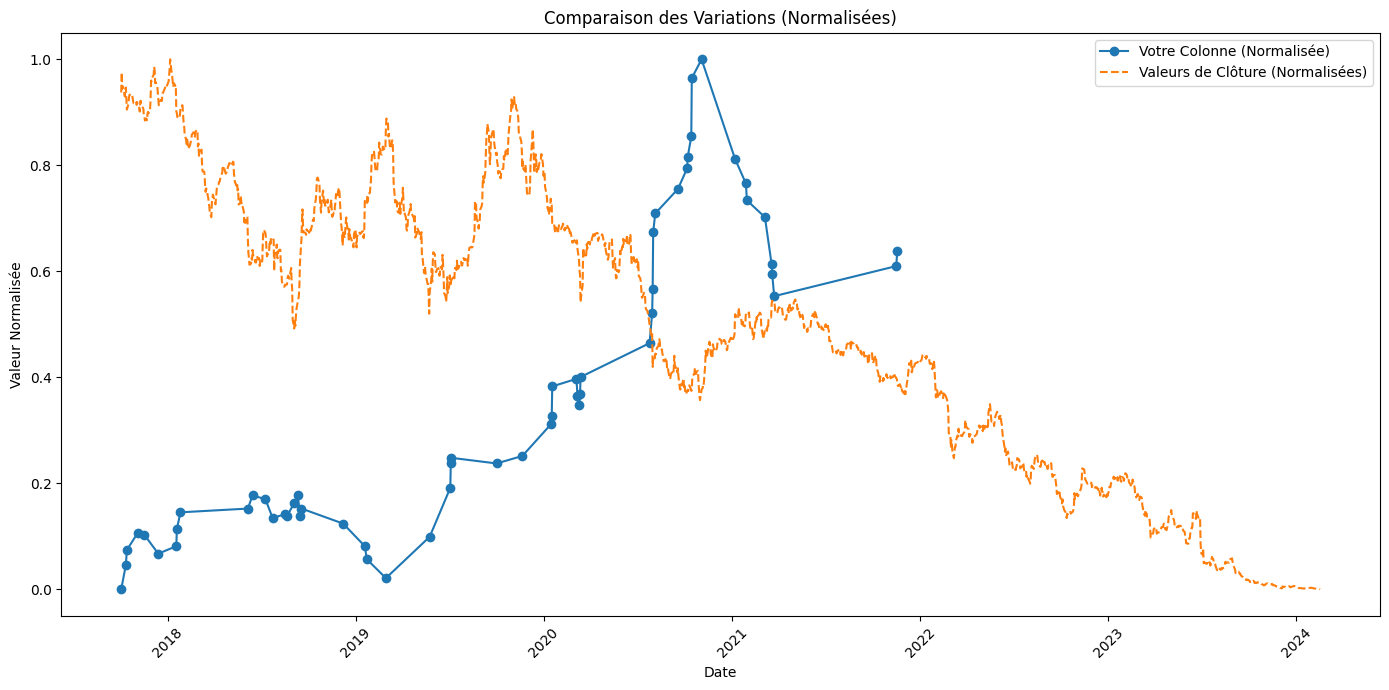

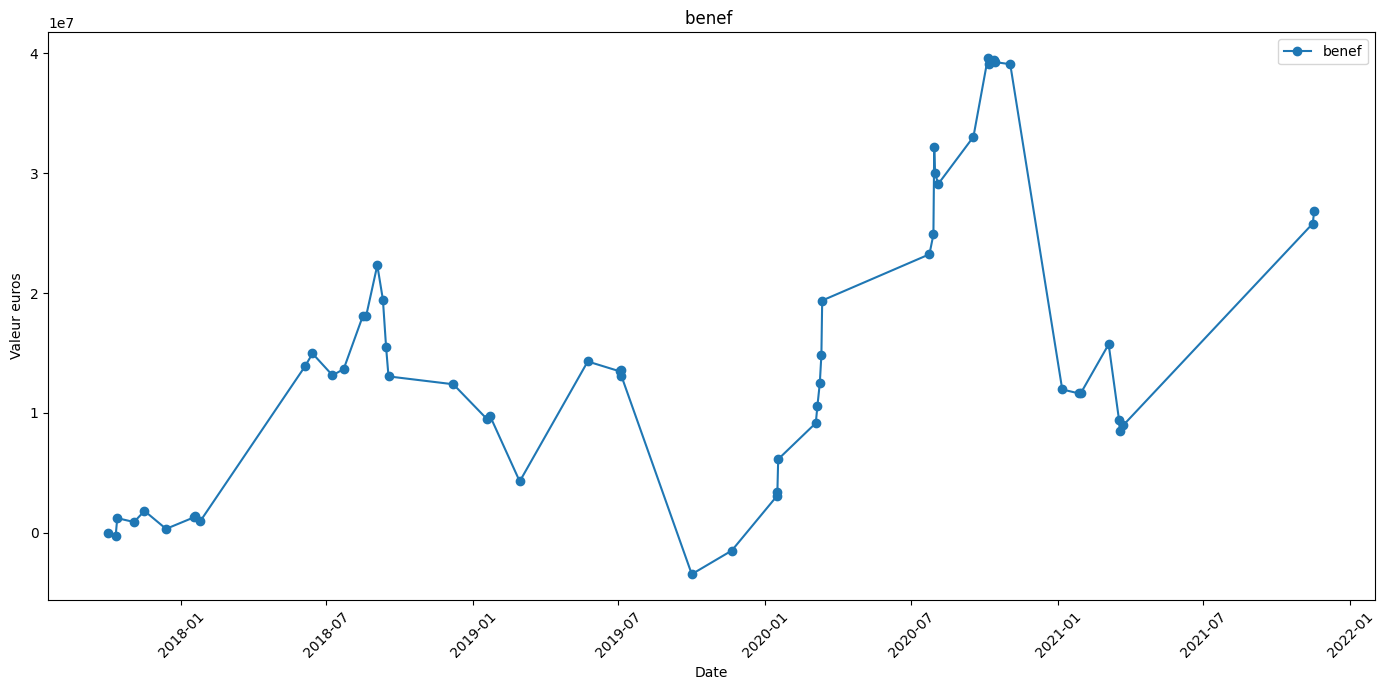

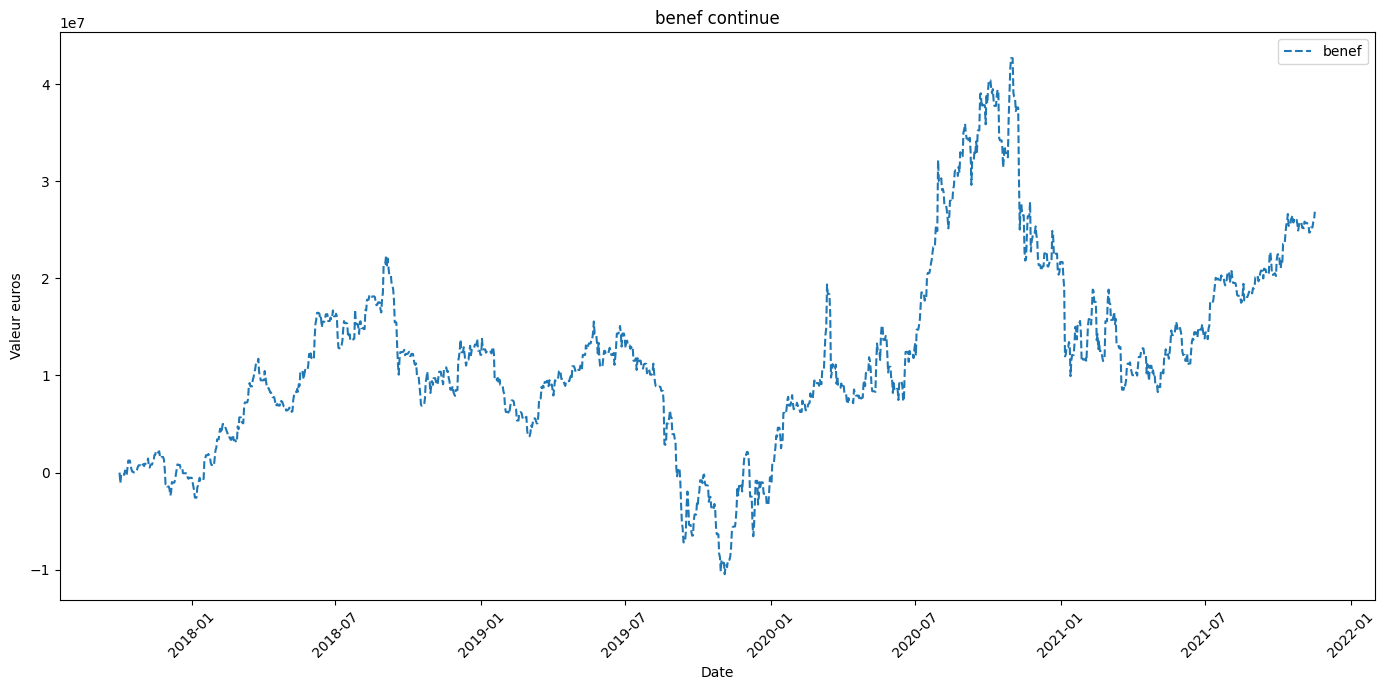

In [13]:
emetteur =  'CASINO GUICHARD-PERRACHON'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef(data,cgg_rows,total_titre)
    benef_continue(data,cgg_rows,total_titre)

# CITADEL ADVISORS EUROPE LIMITED

In [14]:
Holder = "CITADEL ADVISORS EUROPE LIMITED"
visualiser_investissments(Holder, df_sorted)

### AIR FRANCE-KLM

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


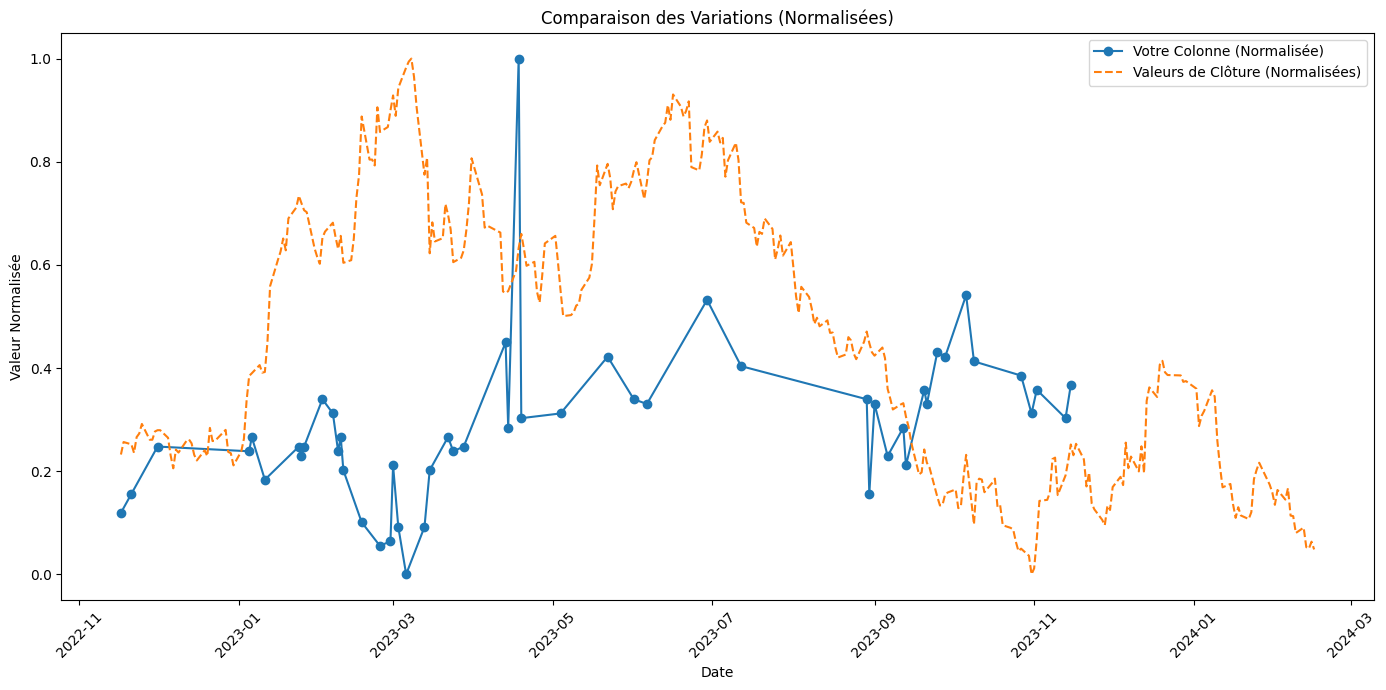

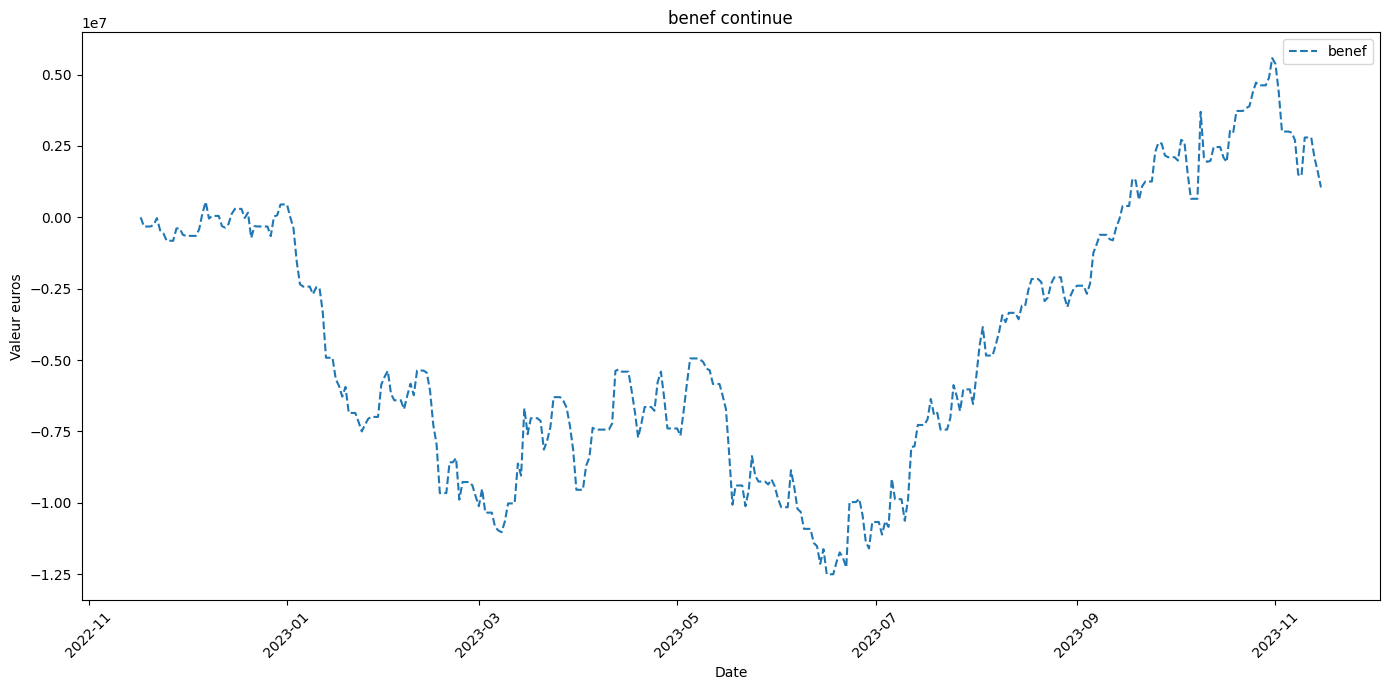

In [15]:
emetteur =  'AIR FRANCE-KLM'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

### ELIS

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


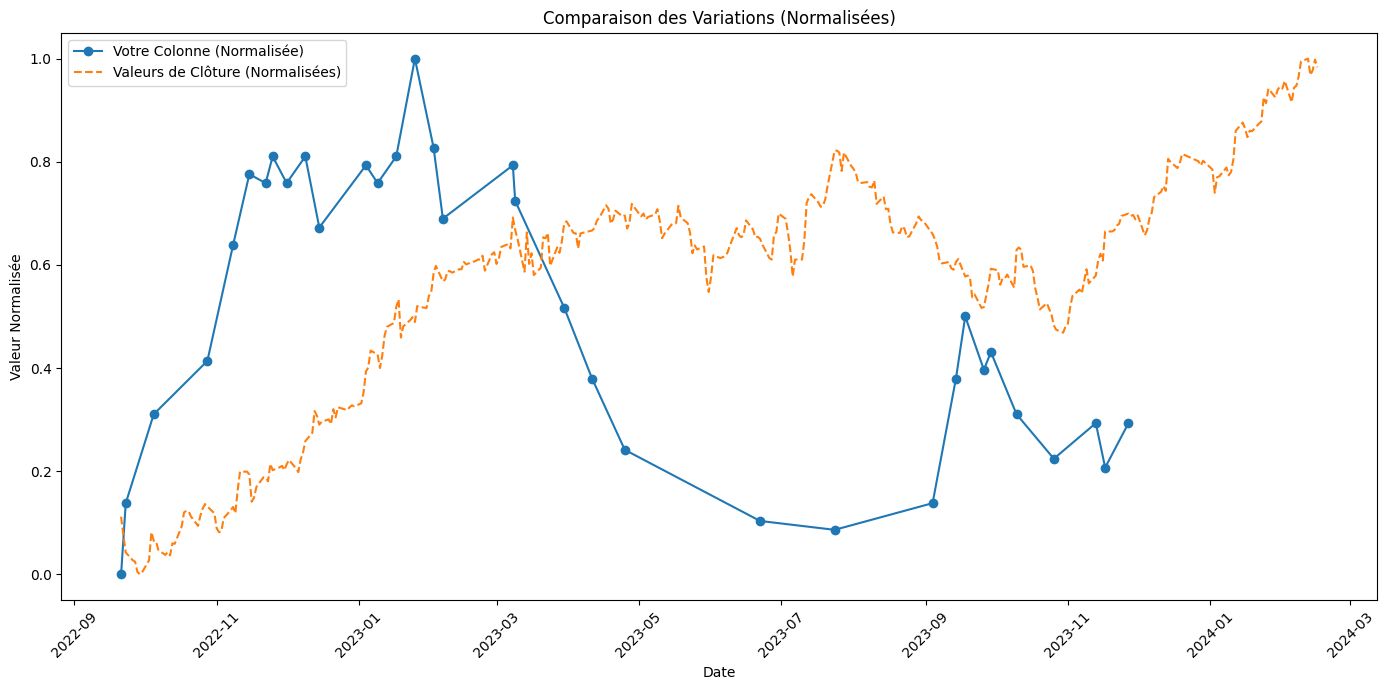

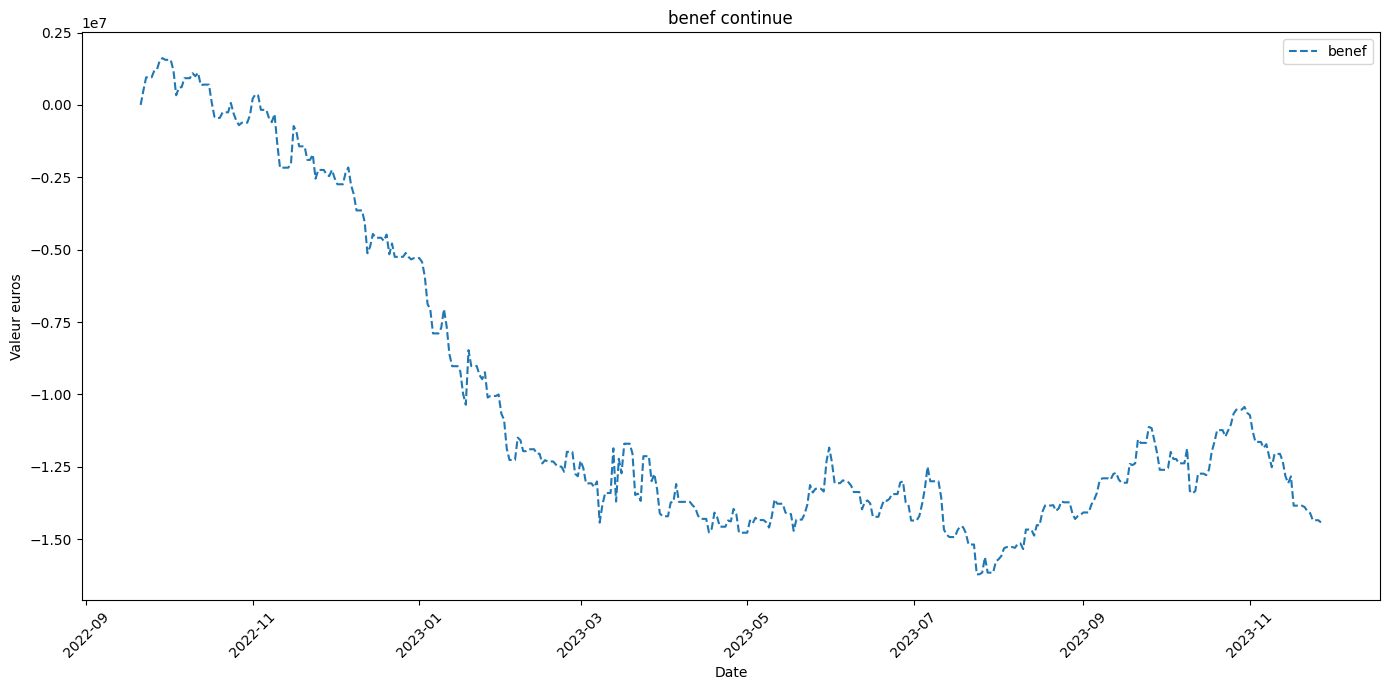

In [17]:
emetteur =  'ELIS'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

# QUBE RESEARCH & TECHNOLOGIES\nLIMITED 

In [18]:
Holder = "QUBE RESEARCH & TECHNOLOGIES\nLIMITED"
visualiser_investissments(Holder, df_sorted)

### CGG

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


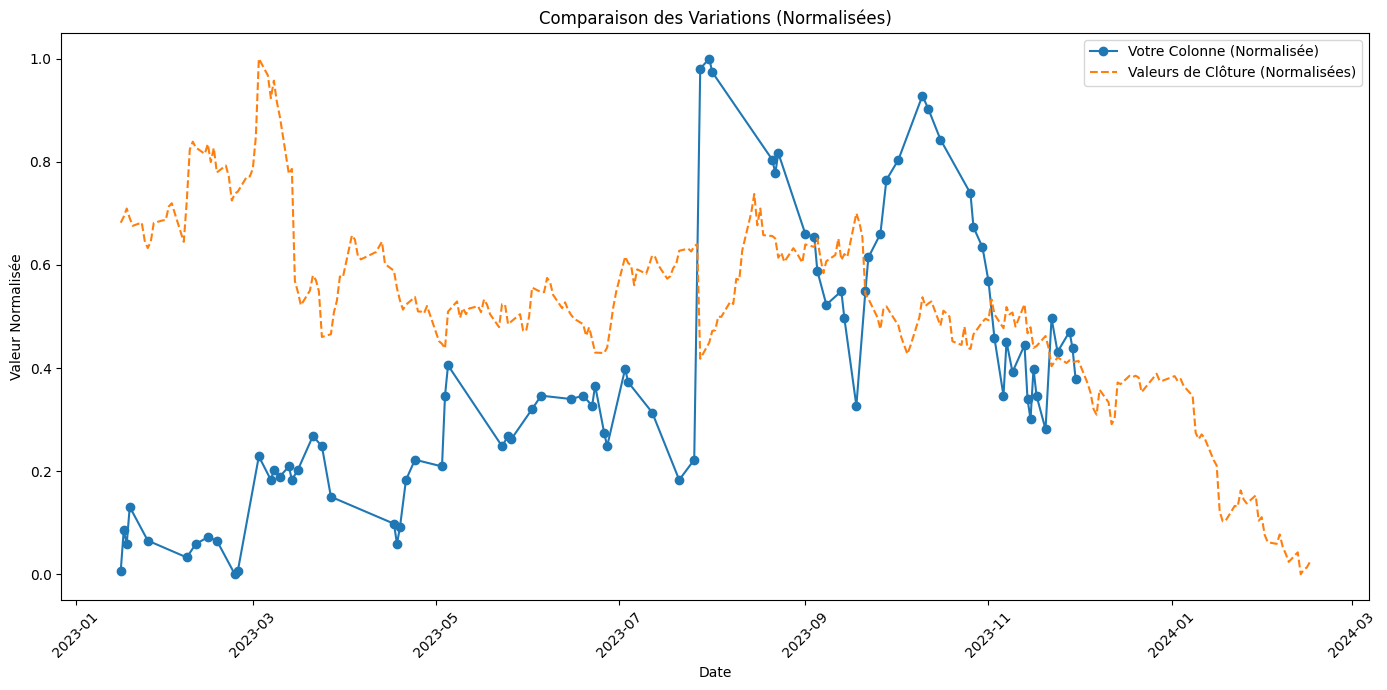

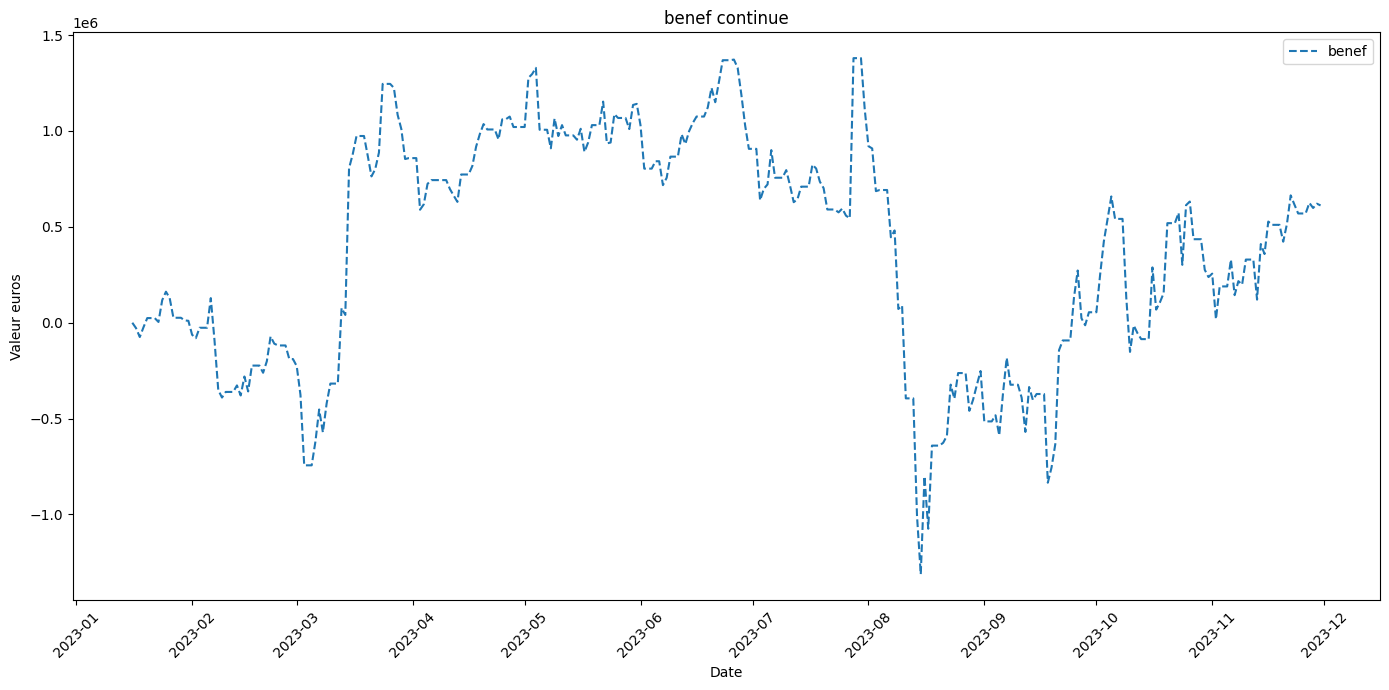

In [19]:
emetteur =  'CGG'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

### ATOS

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


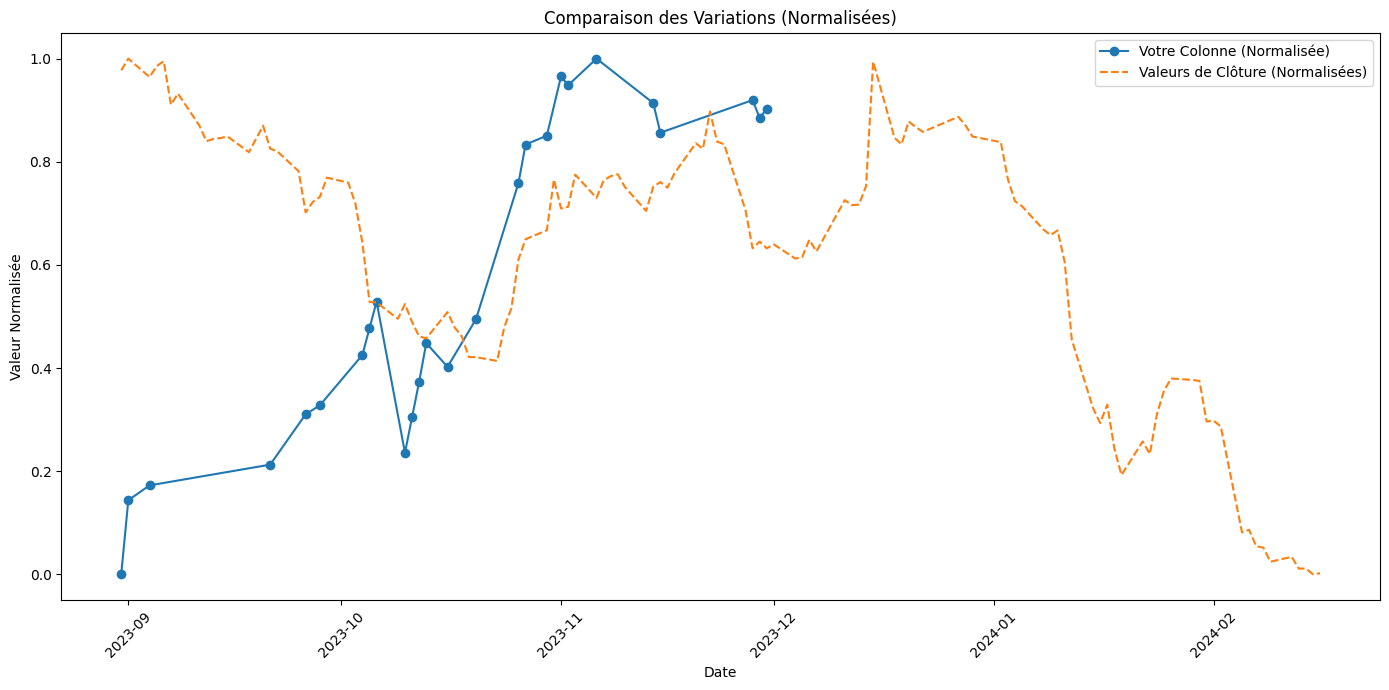

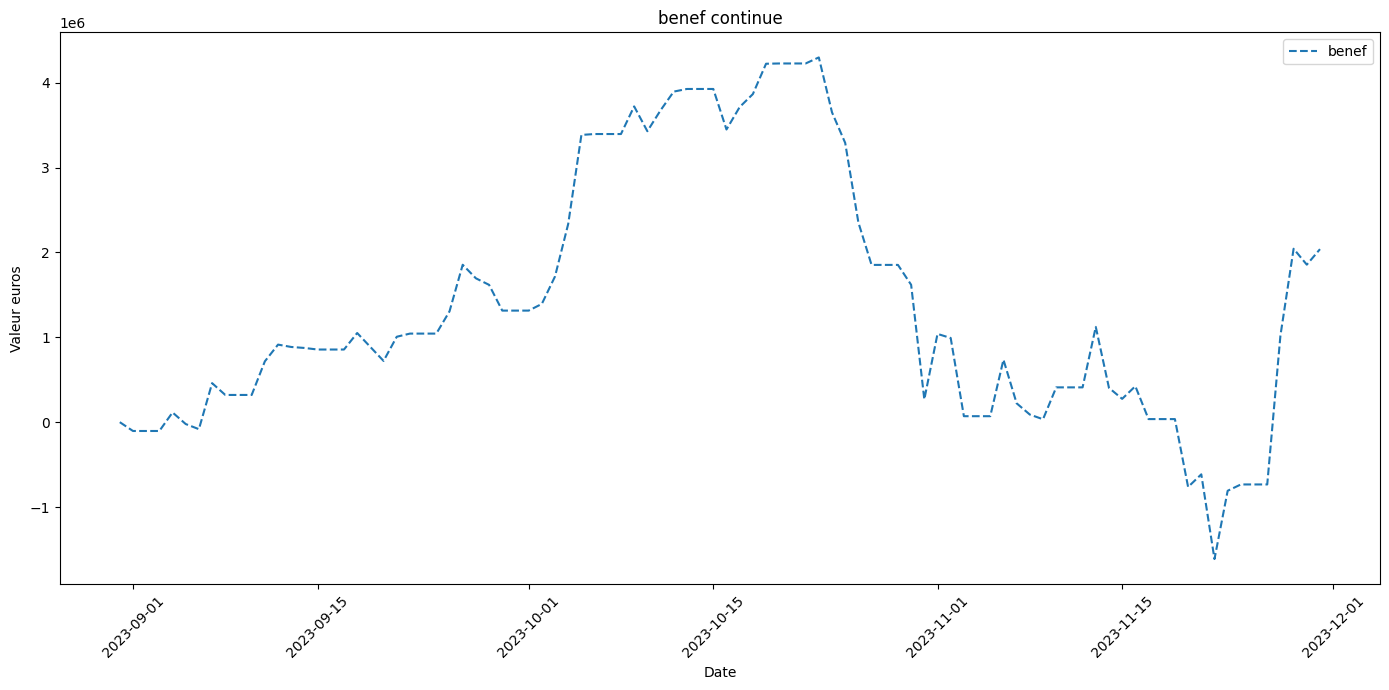

In [21]:
emetteur =  'ATOS SE'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)


# MARSHALL WACE LLP

In [22]:
Holder = "MARSHALL WACE LLP"
visualiser_investissments(Holder, df_sorted)

### RENAULT 

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


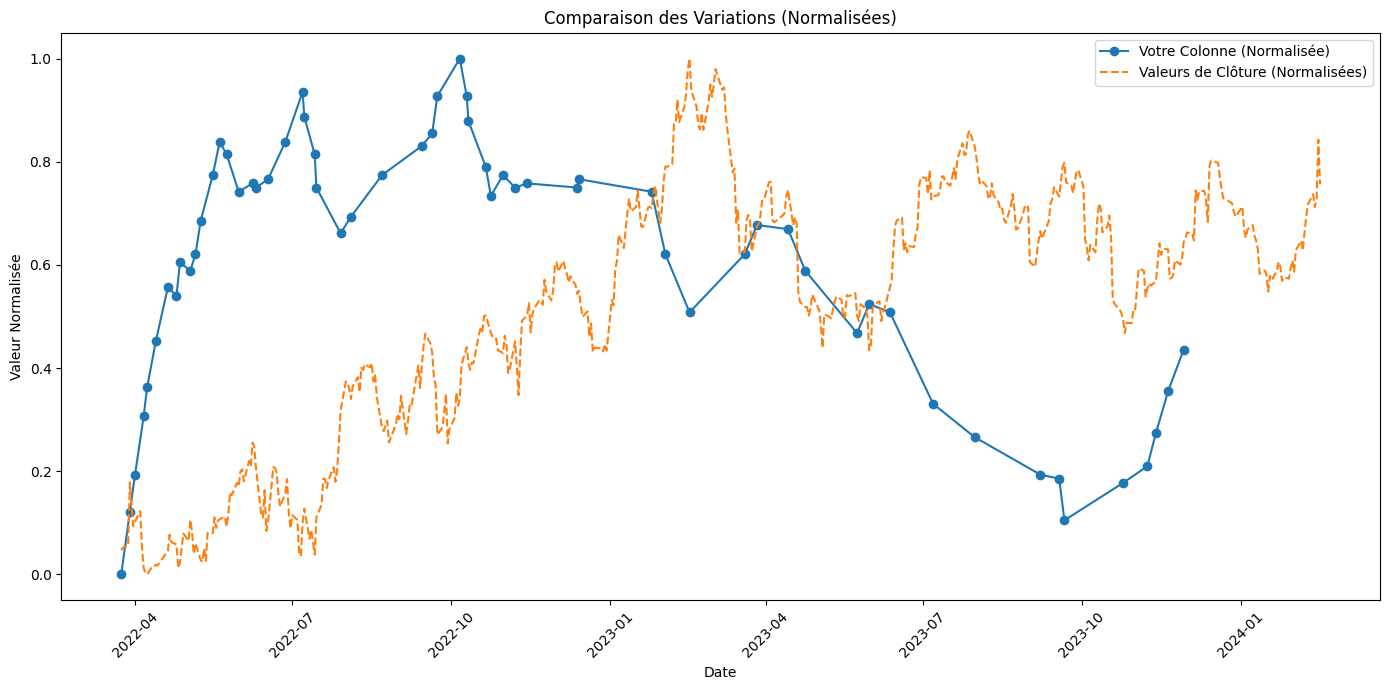

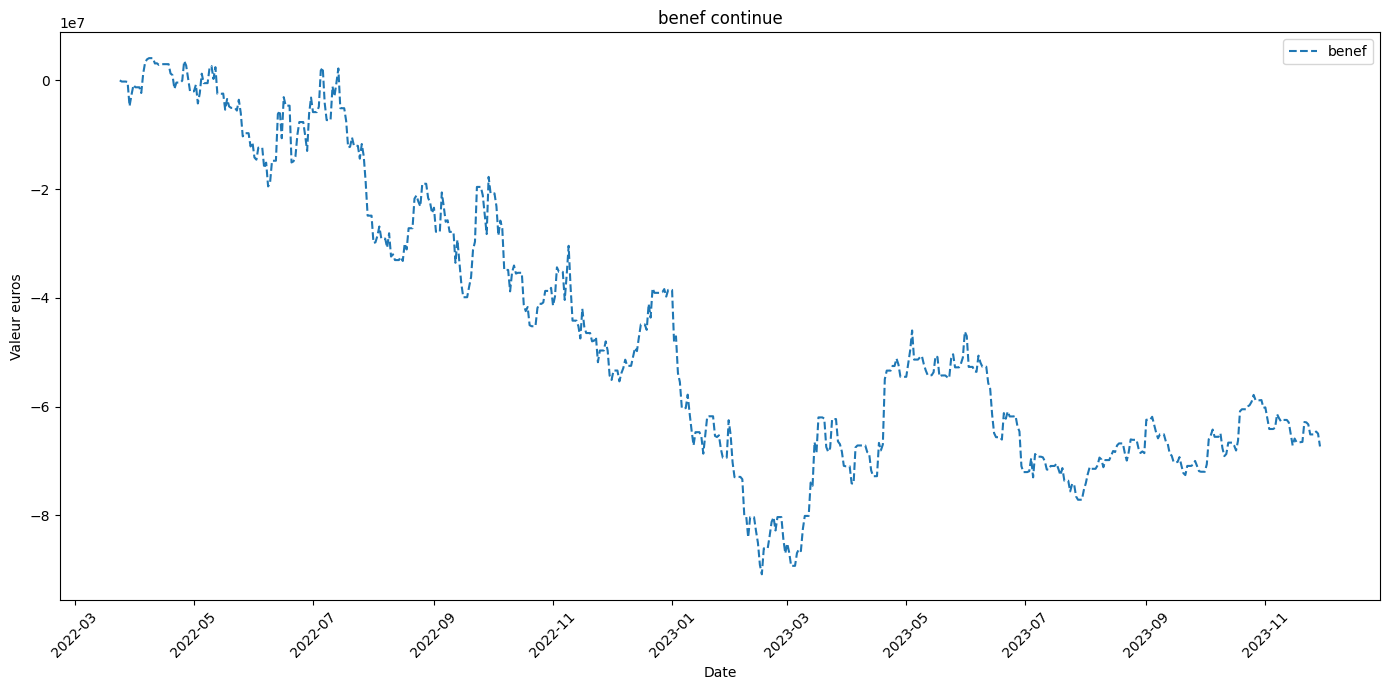

In [25]:
emetteur =  'RENAULT'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

### CGG

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


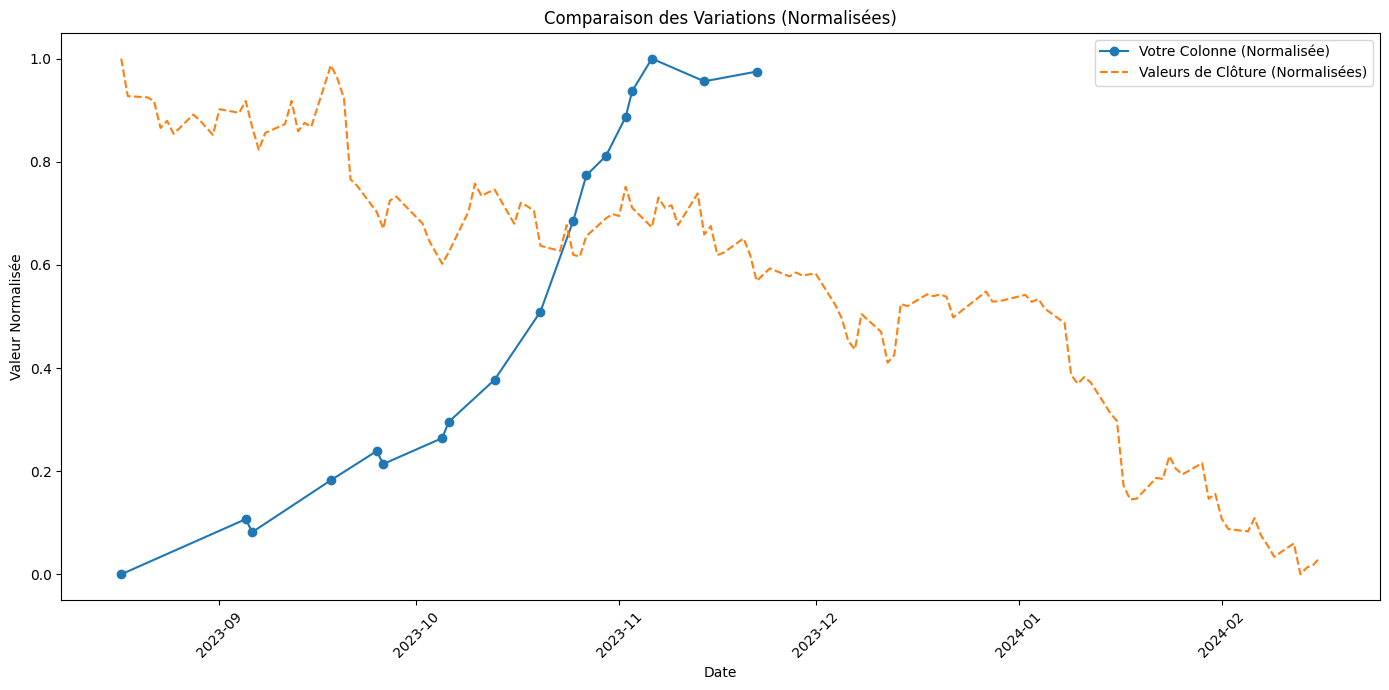

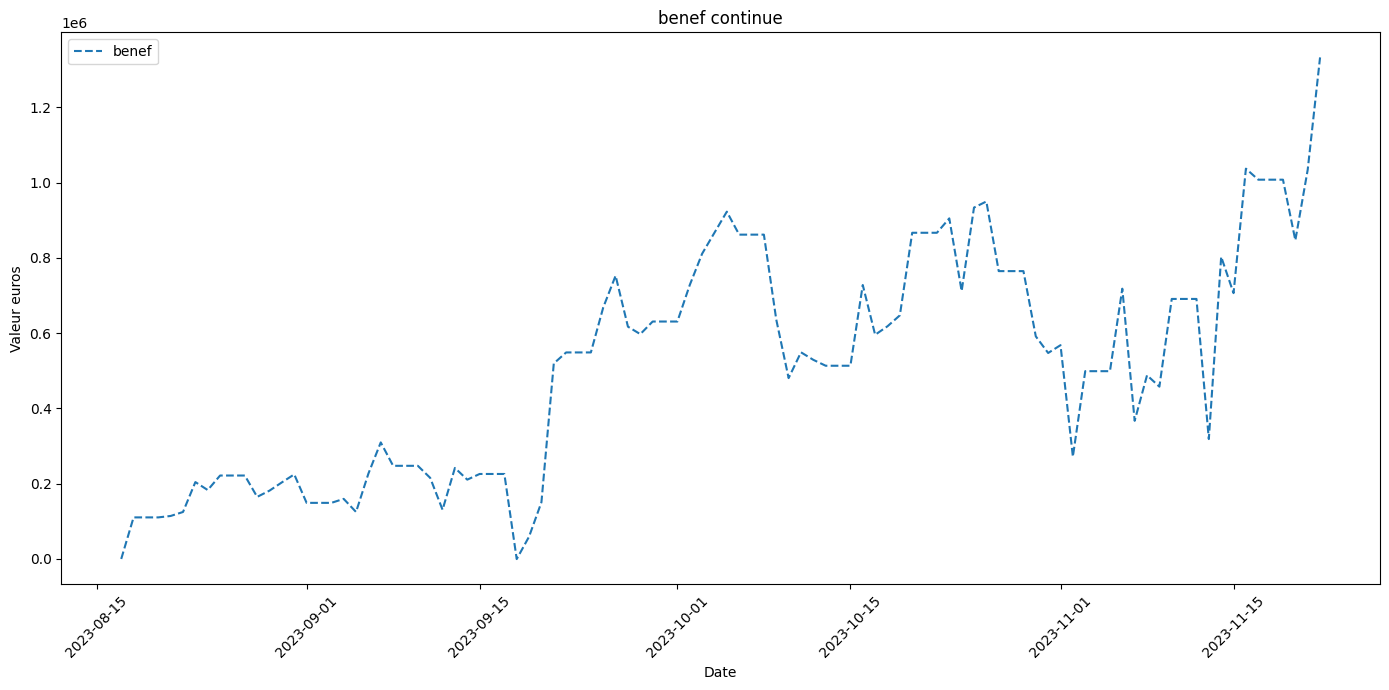

In [26]:
emetteur =  'CGG'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

## AIR FRANCE-KLM

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


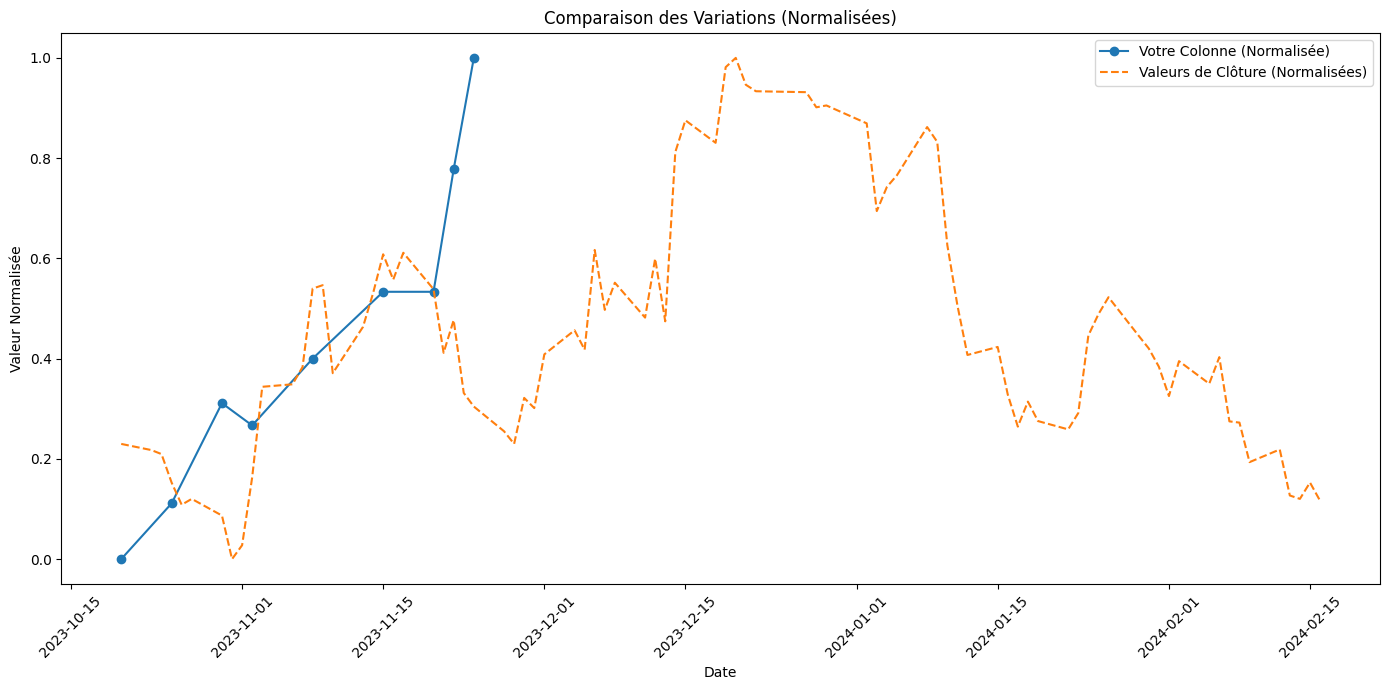

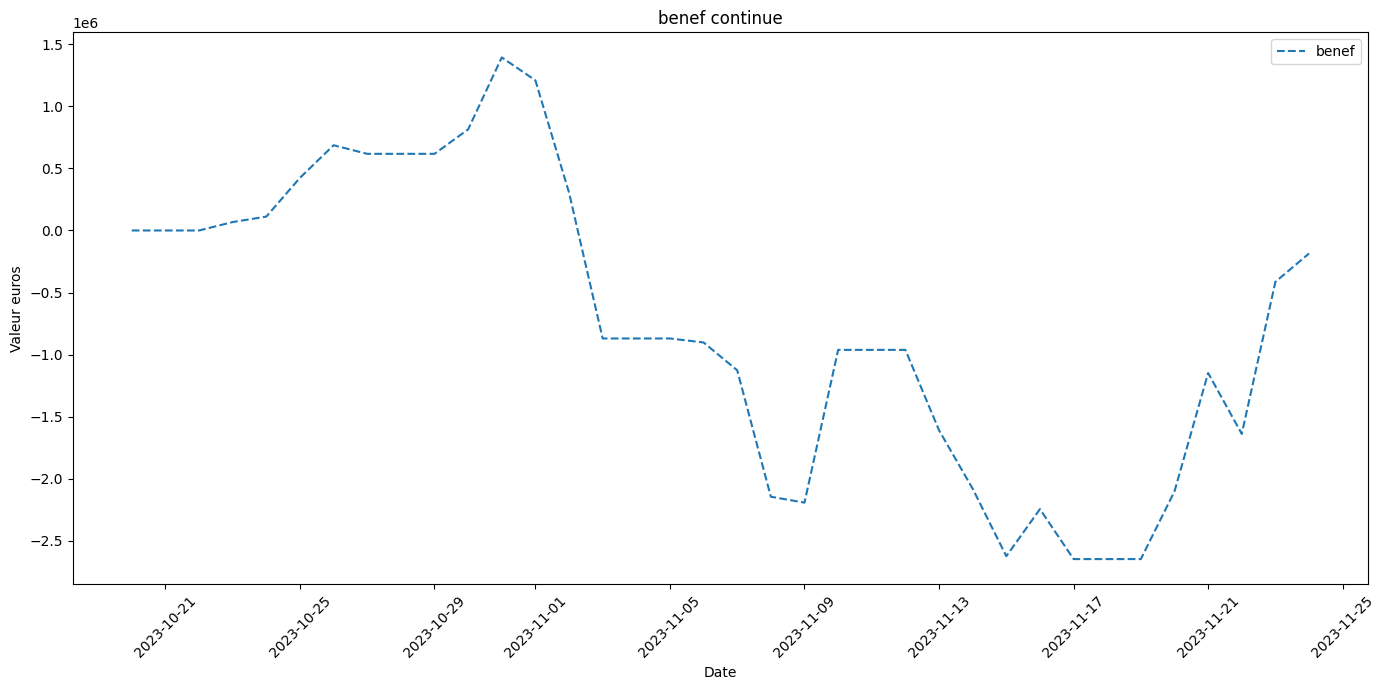

In [28]:
emetteur =  'AIR FRANCE-KLM'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

# MILLENNIUM CAPITAL PARTNERS LLP

In [29]:
Holder  = "MILLENNIUM CAPITAL PARTNERS LLP"
visualiser_investissments(Holder, df_sorted, True)

### CASINO\n GUICHARD-PERRACHON

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


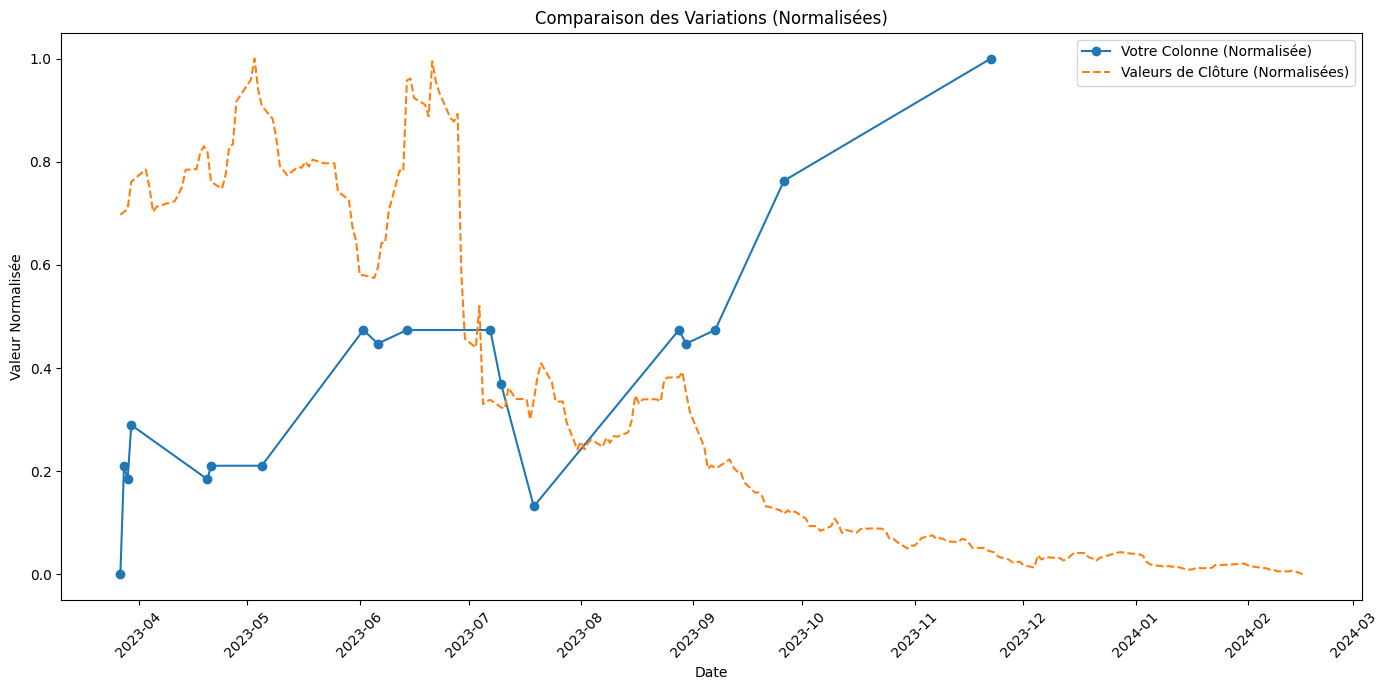

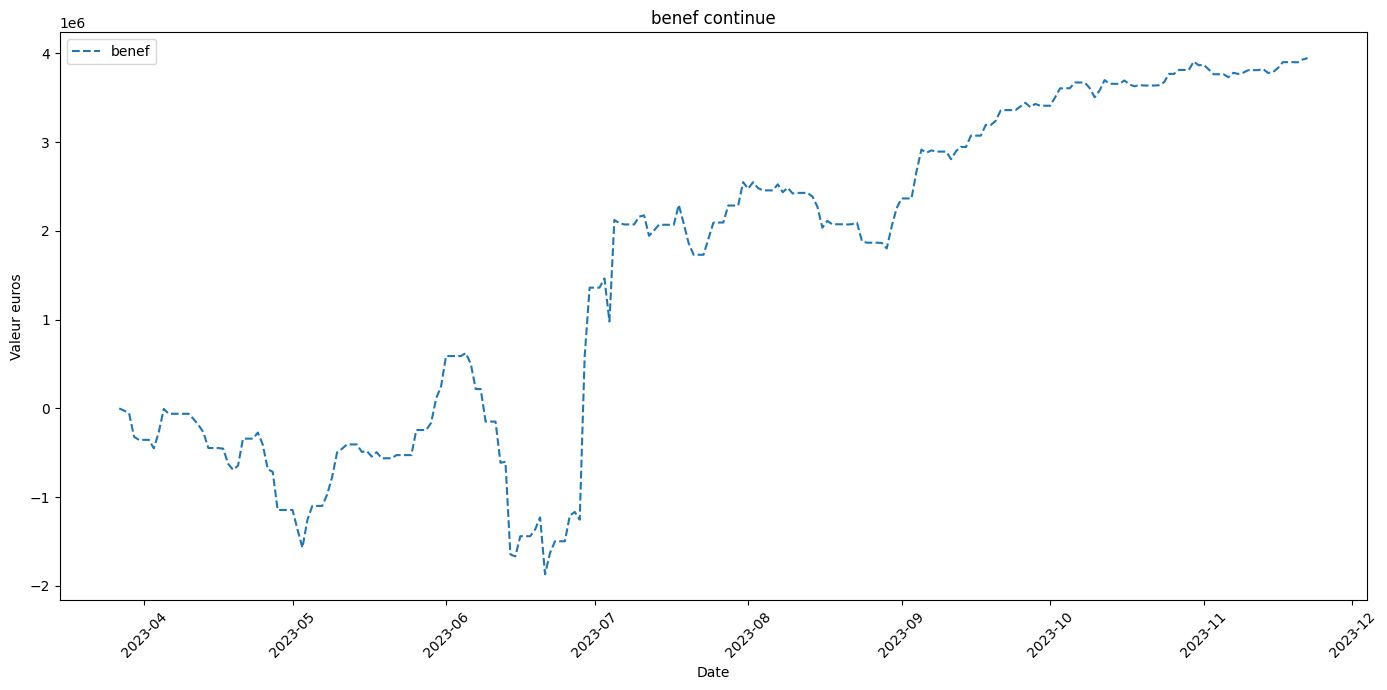

In [30]:
emetteur =  'CASINO GUICHARD-PERRACHON'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

### ATOS

/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


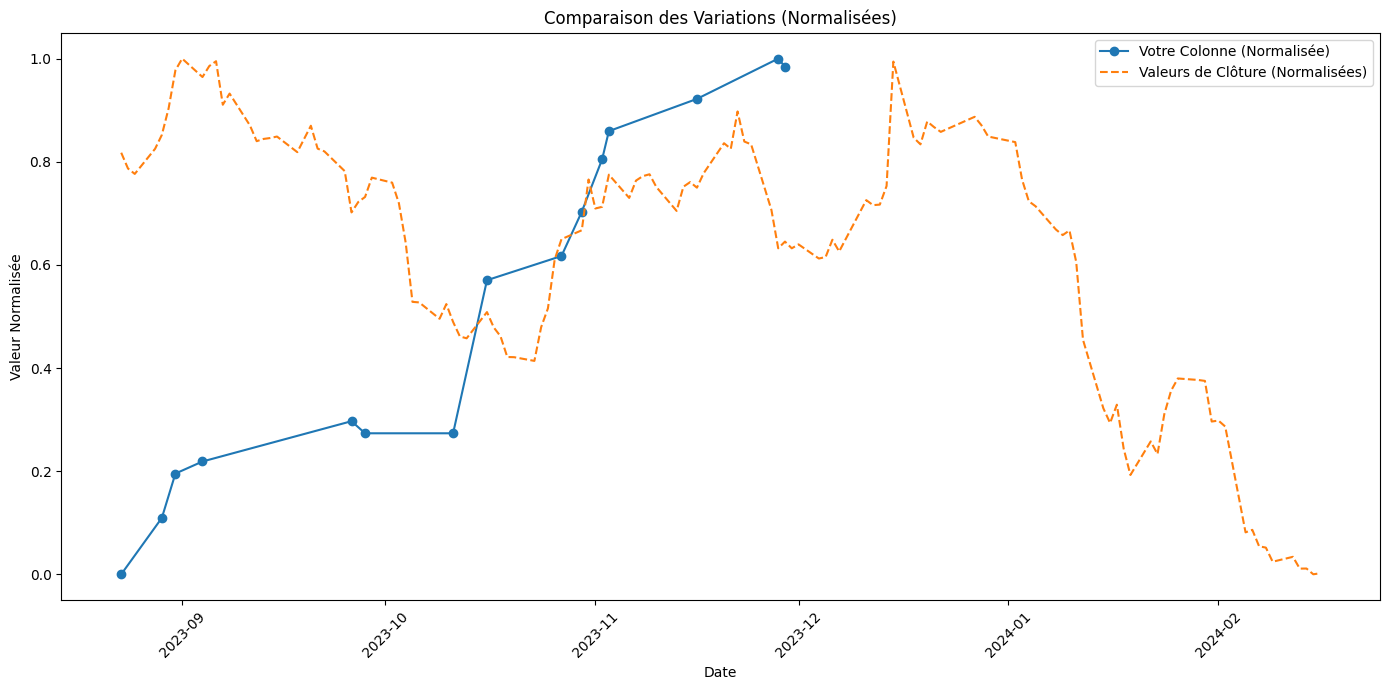

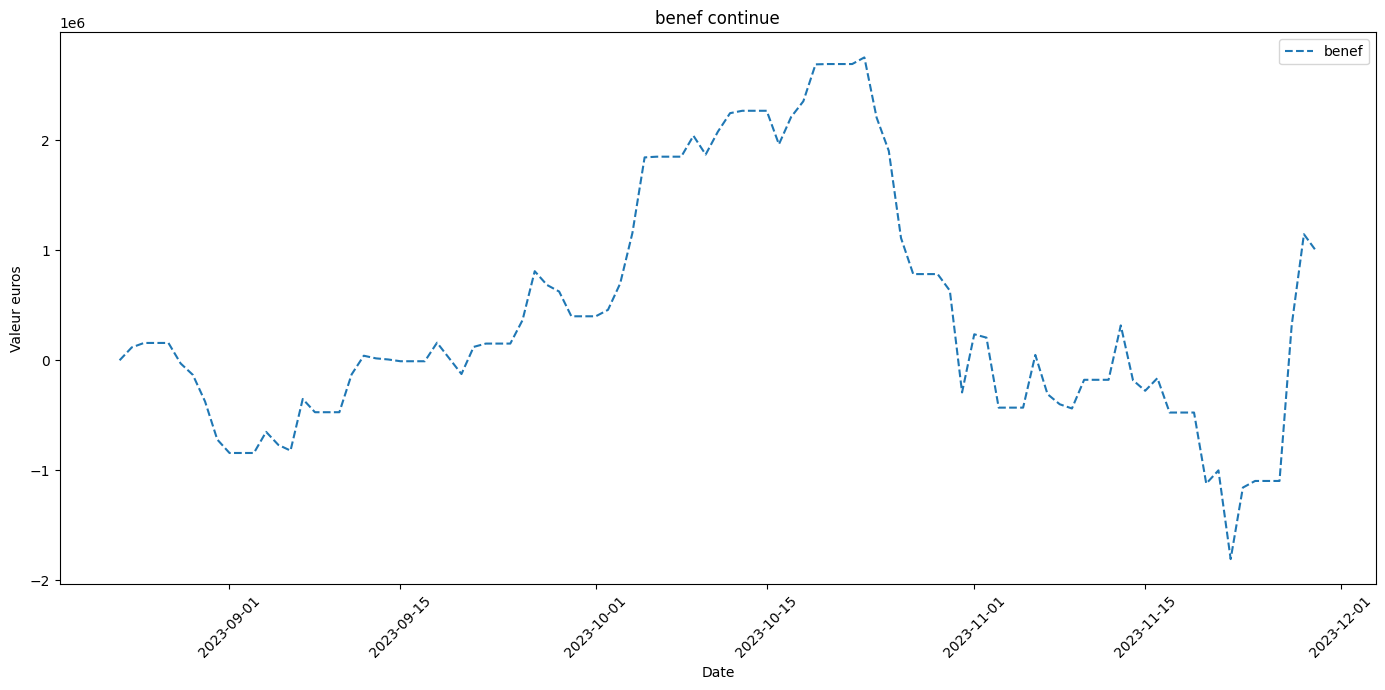

In [31]:
emetteur =  'ATOS SE'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    benef_continue(data,cgg_rows,total_titre)

### REXEL

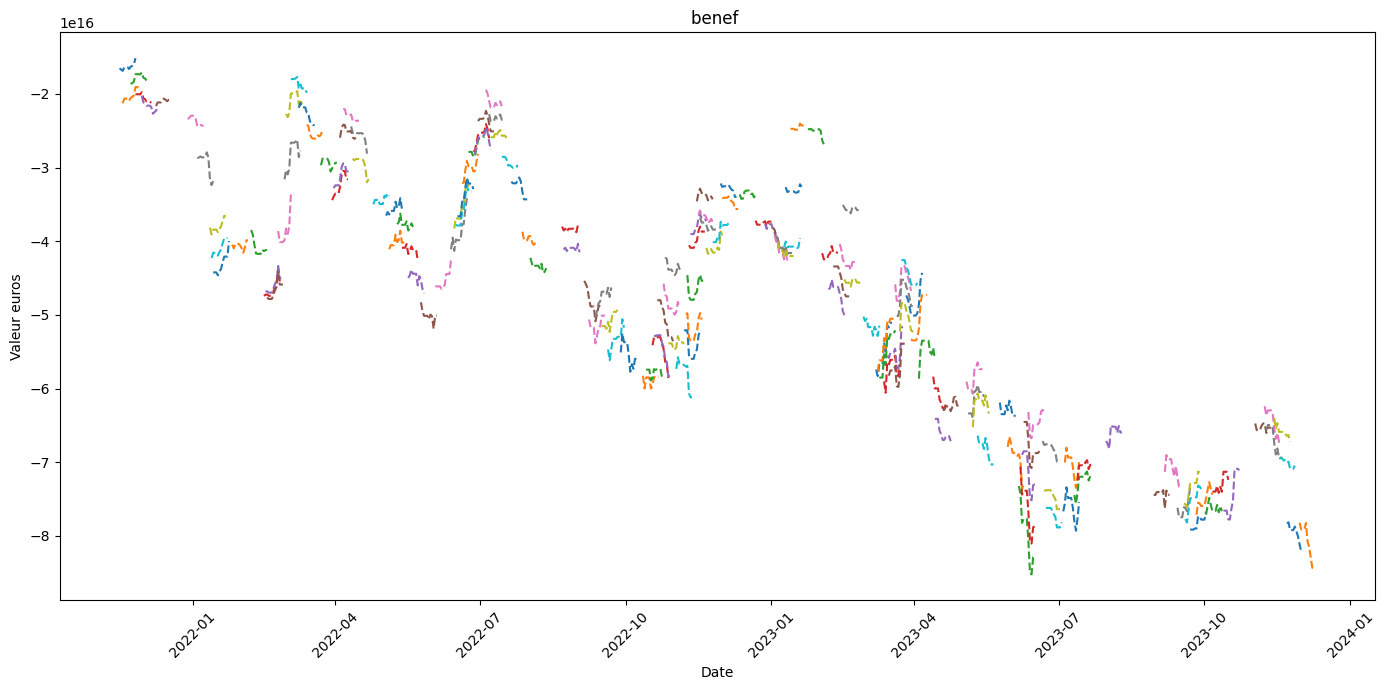

In [307]:
# Vérifier la pertinence pour chaque nouvelles positions en projetant sur un certain nombre de jour sa valeur possible de rachat 

add_how_many_days=10

total_titre = 100_200_300

holding = np.array(cgg_rows[cgg_rows.columns[0]])/100

dates = [index[2] for index in cgg_rows.index ]

value_action = [data['Close'][pd.to_datetime(date)] for date in  dates]

dates_f = [ [date + pd.Timedelta(days=k) for k in range(add_how_many_days+1)] for date in dates  ]


initial_value = holding[0]
variation_holding =  holding[1:] - holding[:-1]

achat_init = value_action[0]  * total_titre * initial_value
delta_achat = np.array(value_action[1:]) * total_titre * variation_holding
ventes = np.array([achat_init + np.sum(delta_achat[:k]) for k in range(len(delta_achat)+1)])


ventes_f = np.array([[vente]*(add_how_many_days+1) for vente in ventes ])


value_action = []
for date in  dates_f : 
    add = [data['Close'][pd.to_datetime(date[0])]]
    for dat in date[1:] :
        try:
            add+= [data['Close'][pd.to_datetime(dat)]]
        except Exception as e:
            #print("ok")
            add+= [add[-1]]
    value_action += [add]

value_action = np.array(value_action)
prix_achat =value_action * total_titre * ventes

# Création du graphique
plt.figure(figsize=(14, 7))

for k in range(len(dates)) : 
    dates_your_df =  pd.to_datetime(dates[k])
    benef_par_jour = ventes_f[k] - prix_achat[k] 

    plt.plot(dates_your_df, benef_par_jour, label='benef', linestyle='--')


# Configuration du graphique
plt.title('benef ')
plt.xlabel('Date')
plt.ylabel('Valeur euros')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


/Users/sacha/Desktop/Web-Scrapping-Analyse-net-short-position/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


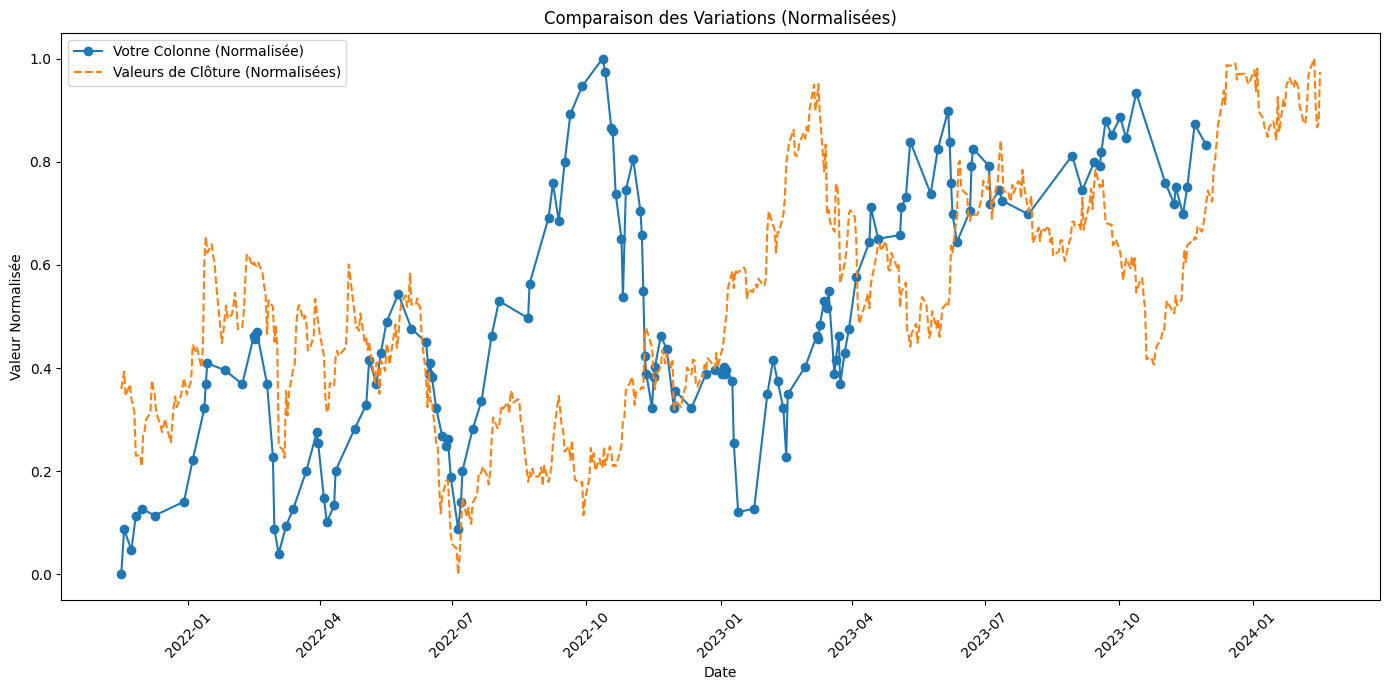

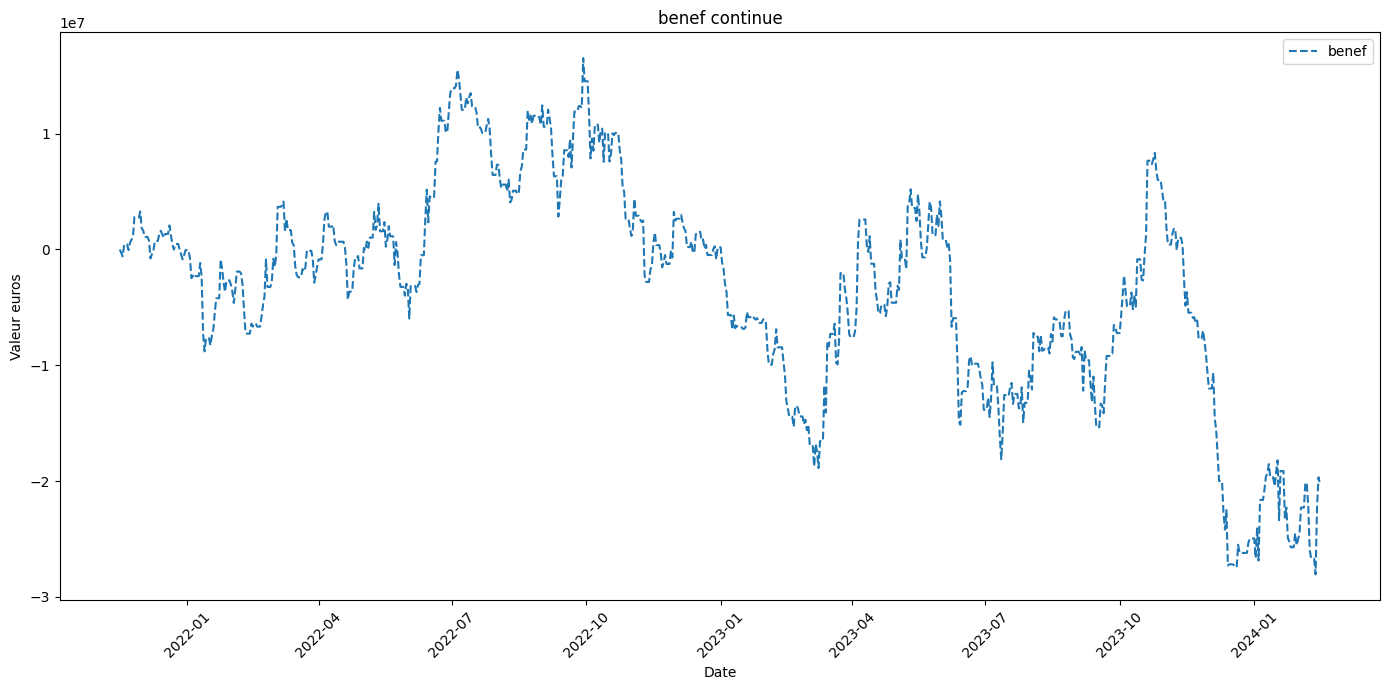

In [32]:
emetteur =  'REXEL'
cgg_rows , start_date = visualiser_investissment(Holder,emetteur,df_sorted,False)

ticker = ticker_dic.get(emetteur, False)
if ticker :
    data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
    total_titre = get_nombre_total_titre(ticker.split('.')[0])
    data_benef = benef_continue(data,cgg_rows,total_titre,True)
    #benef(data,cgg_rows,total_titre)

In [267]:
data_benef.mean()

-1121371.6298063681

In [268]:
data_benef.mean() + data_benef.std()

1998744.7206013636

In [269]:
data_benef.mean() - data_benef.std()

-4241487.9802141

In [270]:
data_benef.min()

-9351142.886647455

In [271]:
data_benef.max()

5507909.932929151

In [ ]:
data_benef.

# Recherche de période 

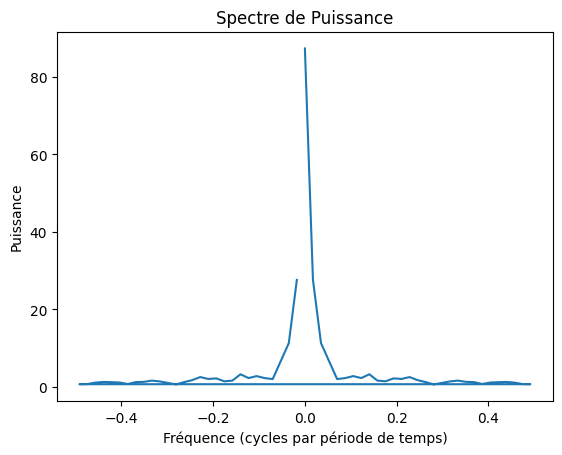

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'values' est un array numpy de vos valeurs standardisées
values =np.array(cgg_rows[cgg_rows.columns[0]]) 

# Analyse de Fourier pour détecter les fréquences dominantes
fft_values = np.fft.fft(values)
frequencies = np.fft.fftfreq(len(values))

# Tracer le spectre de puissance
power = np.abs(fft_values)
plt.plot(frequencies, power)
plt.title('Spectre de Puissance')
plt.xlabel('Fréquence (cycles par période de temps)')
plt.ylabel('Puissance')

# Identifier les pics dans le spectre de puissance pour détecter les cycles dominants
# Vous devrez définir un seuil pour déterminer ce qui est considéré comme un "pic" significatif

plt.show()


In [32]:
import numpy as np

# Effectuer l'analyse de Fourier
fft_values = np.fft.fft(values)
frequencies = np.fft.fftfreq(len(values), d=1)  # d est la période d'échantillonnage, mettre la valeur appropriée
power = np.abs(fft_values)

# Identifier les pics dans le spectre de puissance
threshold = 0.02 * np.max(power)  # Seuil arbitraire, à ajuster selon vos données
peaks = power > threshold

# Convertir les fréquences des pics en périodes temporelles (en jours)
peak_frequencies = frequencies[peaks]
peak_periods = 1 / peak_frequencies

# Afficher les pics et leurs périodes correspondantes
for freq, period in zip(peak_frequencies, peak_periods):
    print(f"Pic à la fréquence {freq} correspond à une période de {period} jours")

# Supposons que vous avez un DataFrame 'df' avec une colonne 'Date' et une colonne 'Values'
# Vous pouvez maintenant segmenter votre DataFrame en sous-ensembles correspondant à chaque période dominante
# Pour simplifier, prenons une période dominante pour l'exemple
dominant_period = np.min(peak_periods[peak_periods > 0])  # Période la plus courte non nulle
num_periods = int(len(values) / dominant_period)

# Créer des sous-ensembles de valeurs pour chaque cycle
subsets = [values[i * int(dominant_period):(i + 1) * int(dominant_period)] for i in range(num_periods)]

# Chaque sous-ensemble dans 'subsets' correspond à un cycle de la période dominante


Pic à la fréquence 0.0 correspond à une période de inf jours
Pic à la fréquence 0.017543859649122806 correspond à une période de 57.0 jours
Pic à la fréquence 0.03508771929824561 correspond à une période de 28.5 jours
Pic à la fréquence 0.05263157894736842 correspond à une période de 19.0 jours
Pic à la fréquence 0.07017543859649122 correspond à une période de 14.25 jours
Pic à la fréquence 0.08771929824561403 correspond à une période de 11.4 jours
Pic à la fréquence 0.10526315789473684 correspond à une période de 9.5 jours
Pic à la fréquence 0.12280701754385964 correspond à une période de 8.142857142857144 jours
Pic à la fréquence 0.14035087719298245 correspond à une période de 7.125 jours
Pic à la fréquence 0.19298245614035087 correspond à une période de 5.1818181818181825 jours
Pic à la fréquence 0.21052631578947367 correspond à une période de 4.75 jours
Pic à la fréquence 0.22807017543859648 correspond à une période de 4.384615384615385 jours
Pic à la fréquence -0.22807017543859648

/var/folders/fp/hfmjvl7d45gft5_1gf2dzn640000gn/T/ipykernel_36392/3312183671.py:14: RuntimeWarning:

divide by zero encountered in divide



In [81]:
subsets

[array([0.51, 0.64, 0.58, 0.68, 0.7 , 0.68, 0.72, 0.84, 0.99, 1.06, 1.12,
        1.1 , 1.06, 1.2 , 1.19, 1.21, 1.06, 0.85, 0.64, 0.57, 0.65]),
 array([0.7 , 0.81, 0.92, 0.89, 0.73, 0.66, 0.71, 0.81, 0.93, 1.  , 1.13,
        1.06, 1.15, 1.24, 1.32, 1.22, 1.18, 1.09, 1.12, 1.08, 0.99]),
 array([0.91, 0.88, 0.9 , 0.79, 0.64, 0.72, 0.81, 0.93, 1.01, 1.2 , 1.3 ,
        1.25, 1.35, 1.54, 1.64, 1.53, 1.7 , 1.84, 1.92, 2.  , 1.96]),
 array([1.8 , 1.79, 1.61, 1.48, 1.31, 1.62, 1.71, 1.56, 1.49, 1.33, 1.14,
        1.09, 0.99, 1.08, 1.11, 1.2 , 1.16, 0.99, 1.04, 0.99, 1.09]),
 array([1.1 , 1.09, 1.11, 1.09, 1.1 , 1.07, 0.89, 0.69, 0.7 , 1.03, 1.13,
        1.07, 0.99, 0.85, 1.03, 1.11, 1.2 , 1.19, 1.23, 1.3 , 1.28]),
 array([1.33, 1.09, 1.13, 1.2 , 1.06, 1.15, 1.22, 1.37, 1.47, 1.57, 1.48,
        1.49, 1.57, 1.6 , 1.76, 1.61, 1.74, 1.85, 1.76, 1.64, 1.55]),
 array([1.47, 1.56, 1.69, 1.74, 1.69, 1.58, 1.62, 1.59, 1.55, 1.72, 1.62,
        1.7 , 1.69, 1.73, 1.82, 1.78, 1.83, 1.77, 1.9 , 1.64, 